# Social touch protocol

## 1.  Motivation

#### The purpose of this preliminary study is to extract relevant informations about social touch gestures in each video of SATE (social affective touch expression) database. for instance:
 + #### Touch zones involved ( arm, chest, back,...).
 + #### Type of touch (stroke, tap, grab, hold,...).
 + #### Initiative (  subject whom starts the interaction).
 + #### Valence/Arousal.


#### The first step, is to skim all social touch interactions videos and annotate them based on the variables described below (touch zones,...) and the touch vocabulary defined in section 2. Then, analyze the annotations data to decide which device to use and where the sensors will be placed in human body (zones)
 

### *Protocol of the intended experiment*

<img src="proto.jpg" width="80%"> 

## 2. Body parts and annotation

| Number        | Name          |
| ------------- |-------------| 
| 0             | hand         | 
| 1             | forearm        | 
| 2             | arm           | 
| 3             | shoulder      | 
| 4             | chest         | 
| 5             | abs           | 
| 6             | lower leg     | 
| 7             | upper back    | 
| 8             | lower back    | 


<img src="data/body.jpg" width="40%"> 

## 3. Exploratory analysis on ST data

In [35]:
import pandas as pd
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


def bar(data):
    sizes=np.sum(data,axis=0)
    label=['hand','forearm','arm','shoul','chest','abs','uback','lback']
    
    plt.bar(label, sizes,label='Men')
    plt.savefig('pie.png')
    plt.show()
    
def do_classify(X,y):
    importance=[]
    scores=[]
    for i in range(100):
        clf = ExtraTreesClassifier(n_estimators=10)
        clf = clf.fit(X, y)
        scores.append(clf.score(X,y))
        importance.append(clf.feature_importances_)  
    
    mean_importance=np.mean(importance,axis=0)
    mean_scores=np.mean(scores)
    return mean_importance,mean_scores

df=pd.read_csv('/home/jan/Desktop/workspace/Social_touch/transform_annotation/data.csv',sep=',')



In [36]:
df=df.drop(columns=['Unnamed: 0'])

In [1]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="data/5.mp4">
</video></div>""")

NameError: name 'HTML' is not defined

In [37]:
print(df.shape)
df.head()


(144, 26)


,F0,F1,F2,F3,F4,F5,F6,F7,M0,M1,...,NAME,VIDEO_NUM,Actors-Pair,INITIATIVE_F,INITIATIVE_M,ACTION,Stimulus,Valence,Arousal,Motion Energy
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Emmanuel,2,1,0,1,hug,2,7.931818,6.5,565545.5625
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,Aymane,2,1,0,1,hug,2,7.931818,6.5,565545.5625
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Giuseppe,2,1,0,1,hug,2,7.931818,6.5,565545.5625
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Ayoub,2,1,0,1,hug,2,7.931818,6.5,565545.5625
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Frank,2,1,0,1,hug,2,7.931818,6.5,565545.5625


## Variables definition 

#### In this clip (VIDEO_NUM=5) the F participant is stroking the M participant shoulder and arm.
#### The activated zones are:
+ #### F0=1 (female hand)
+ #### M2=1 (male arm), M3=1(male shoulder)

## Exploratory Analysis

In [38]:
data=df.values
print(data.shape," #videos and #attributes")
print("########### touch action ######################")
print(np.unique(data[:,-5]))



(144, 26)  #videos and #attributes
########### touch action ######################
['Shake' 'Slap' 'Stroke' 'Tap' 'hug']


Number of each action 


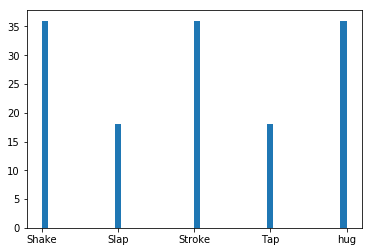

In [39]:
plt.hist(data[:,-5],bins=50)
print("Number of each action ")

In [41]:
np.sum(data[:,:8])

nan

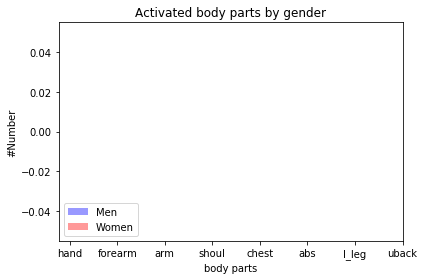

In [32]:
n_groups = 8
means_men = np.sum(data[:,:8],axis=0)
means_women = np.sum(data[:,8:16],axis=0)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Women')

ax.set_xlabel('body parts')
ax.set_ylabel('#Number')
ax.set_title('Activated body parts by gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['hand','forearm','arm','shoul','chest','abs','l_leg','uback','lback'])
ax.legend()


fig.tight_layout()
plt.show()
fig.savefig('activation.png')

####  *The most activated zones are:*
+ Hand
+ Forearm 
+ Arm
+ shoulder

### Tree-based feature selection

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
#keep=[4,5,6,7,13,14,15,16]
data[:,21]=(data[:,21]-np.mean(data[:,21]))/np.std(data[:,21])
X=data[:,0:16]
########### action#############
y_action=data[:,-2]
y_action=pd.get_dummies(y_action).values
y_action=np.argmax(y_action,axis=1)
################ Valence #####################
y_valence=data[:,-1]
y_valence=pd.get_dummies(y_valence).values
y_valence=np.argmax(y_valence,axis=1)
################################################
print("y_action",y_action.shape)
print('y_action',y_action)

print("y_valence",y_valence.shape)
print('y_valence',y_valence)

print('##################### X #############################')
print("Xshape",X.shape)

print(X[:10])


y_action (96,)
y_action [0 1 4 5 6 7 2 3 0 1 4 5 6 7 2 3 0 1 4 5 6 7 2 3 0 1 4 5 6 7 2 3 0 1 4 5 6
 7 2 3 0 1 4 5 6 7 2 3 0 1 4 5 6 7 2 3 0 1 4 5 6 7 2 3 0 1 4 5 6 7 2 3 0 1
 4 5 6 7 2 3 0 1 4 5 6 7 2 3 0 1 4 5 6 7 2 3]
y_valence (96,)
y_valence [3 2 2 2 1 0 0 0 3 2 2 2 1 0 0 0 3 2 2 2 1 0 0 0 3 2 2 2 1 0 0 0 3 2 2 2 1
 0 0 0 3 2 2 2 1 0 0 0 3 2 2 2 1 0 0 0 3 2 2 2 1 0 0 0 3 2 2 2 1 0 0 0 3 2
 2 2 1 0 0 0 3 2 2 2 1 0 0 0 3 2 2 2 1 0 0 0]
##################### X #############################
Xshape (96, 16)
[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0]
 [1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 1.0 1.0 0

In [102]:
mean_importance_action,mean_scores_action=do_classify(X,y_action)
print(mean_importance_action)
print('#############  Accuracy of the classifier for touch_zones/actions(hug,slap,...)',mean_scores_action)

[0.07435595 0.06951445 0.09259824 0.09799864 0.06999012 0.04319734
 0.04343334 0.02174984 0.04489795 0.04381509 0.07680007 0.13833607
 0.0788112  0.04287762 0.04492505 0.01669902]
#############  Accuracy of the classifier for touch_zones/actions(hug,slap,...) 0.6875


In [103]:
mean_importance_valence,mean_scores_valence=do_classify(X,y_valence)
print(mean_importance_valence)
print('#############  Accuracy of the classifier for touch_zones/valence(positice,negative,...)',mean_scores_valence)

[0.05205349 0.03943629 0.0426482  0.0333712  0.07051734 0.13122769
 0.04242702 0.01114542 0.03557288 0.05439471 0.13163972 0.11429987
 0.09228767 0.14144996 0.00592816 0.00160039]
#############  Accuracy of the classifier for touch_zones/valence(positice,negative,...) 0.7916666666666669


In [106]:
_,mean_scores_ME=do_classify(data[:,21].reshape(X.shape[0],1),y_action)
print('#############  Accuracy of the classifier for ME/action(positice,negative,...)',mean_scores_ME)

#############  Accuracy of the classifier for ME/action(positice,negative,...) 1.0


In [107]:
_,mean_scores_ME=do_classify(data[:,21].reshape(X.shape[0],1),y_valence)
print('#############  Accuracy of the classifier for ME/valence(positice,negative,...)',mean_scores_ME)

#############  Accuracy of the classifier for ME/valence(positice,negative,...) 1.0


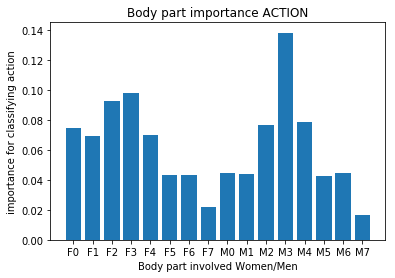

In [110]:
x = np.arange(16)
plt.bar(x, mean_importance_action)
plt.xticks(x, df.columns[0:16])
plt.xlabel("Body part involved Women/Men")
plt.ylabel("importance for classifying action")
plt.title('Body part importance ACTION')
plt.savefig('importaction.png')
plt.show()

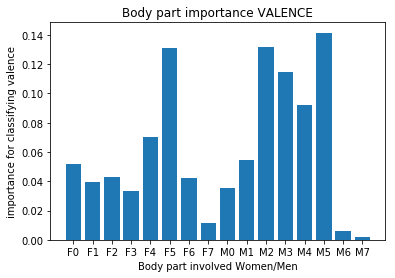

In [111]:
x = np.arange(16)
plt.bar(x, mean_importance_valence)
plt.xticks(x, df.columns[0:16])
plt.xlabel("Body part involved Women/Men")
plt.ylabel("importance for classifying valence")
plt.title('Body part importance VALENCE')
plt.savefig('importacvalence.png')
plt.show()

#### *For touch gestures(Action) classification, the features (zones) are:*
+ F0(hand) > F1(forearm) > F4(chest) >= F3(shoulder) ------>FEMALES
+ M0(hand) > M3(shoulder) >= M2(arm) > M4(chest) ------->MALES

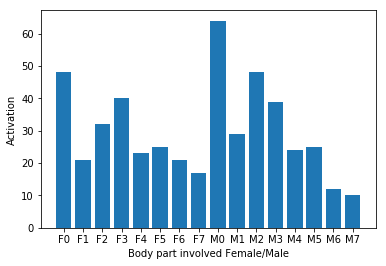

In [112]:
x = np.arange(16)
plt.bar(x, np.sum(X,axis=0))
plt.xticks(x, df.columns[0:16])
plt.xlabel("Body part involved Female/Male")
plt.ylabel("Activation")
plt.show()

#### * Touch gestures(Action) highly activated zones are:*
+ F0(hand) > F1(forearm) > F3(shoulder) > F2(arm) ------>FEMALES
+ M0(hand) > M2(arm) > M1(forearm) > M5(abs) ------->MALES


## 4. Conclusion

The minimal zones (body part) necessary to assure high classification accuray of gestures/actions to reproduce SATE are:
+ hand 
+ forearm 
+ shoulder 
+ arm
+ chest/upback (optional)